In [1]:
from sys import path_hooks

import numpy as np
import random
import os
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout

Import everything

In [2]:
images = []
labels = []
classes = 43

current_path = './GTSRB/Final_Training/Images'

for i in range(classes):
    
    path = ""
    if (i<10):
        path = os.path.join(current_path, str("0000" + str(i)))
    else:
        path = os.path.join(current_path, str("000" + str(i)))
    
    img_folder = os.listdir(path)
    for j in img_folder:
        try:
            image = cv.imread(os.path.join(path, j))
            image = cv.resize(image, (32, 32))
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            image = np.array(image)
            images.append(image)
            label = np.zeros(classes)
            label[i] = 1
            labels.append(label)
        except:
            pass

Reads all files as 32x32 pixels and black and while

In [3]:
images = np.array(images)
images = images/255
labels = np.array(labels)

print(images.shape)
print(labels.shape)

(39209, 32, 32)
(39209, 43)


In [5]:
def pickRandomNumbers(arr, numRandom):
    nums = []
    
    while (len(nums)<numRandom):
        randInd = random.randint(0, len(arr)-1)
        if (randInd not in nums):
            nums.append(randInd)
            
    return nums

def findOneIndex(oneHot):
    for i in range(len(oneHot)):
        if oneHot[i] == 1:
            return i

Used to sample random pictures

In [32]:
# def add_label(image, label, font=cv.FONT_HERSHEY_SIMPLEX, font_scale=0.5, color=(255, 255, 255), thickness=1):
#     labeled_img = np.zeros((image.shape[0] + 20, image.shape[1], 3), dtype=np.uint8)
#     labeled_img[:image.shape[0], :, :] = image
#     label = str(label)
#     cv.putText(labeled_img, label, (10, image.shape[0] + 15), font, font_scale, color, thickness, lineType=cv.LINE_AA)
#     return labeled_img

def add_label(image, label, font=cv.FONT_HERSHEY_SIMPLEX, font_scale=0.5, color=255, thickness=1):
    labeled_img = np.zeros((image.shape[0] + 20, image.shape[1]), dtype=np.uint8)
    labeled_img[:image.shape[0], :] = image

    label = str(label)
    # Put text on the new image
    cv.putText(labeled_img, label, (10, image.shape[0] + 15), font, font_scale, color, thickness, lineType=cv.LINE_AA)

    return labeled_img

def showPics(withPredictions):
    randomInds = pickRandomNumbers(images, 25)
    randomImages = []
    randomLabels = []
    
    for i in range(len(randomInds)):
        randomImages.append(images[randomInds[i]])
        randomLabels.append(findOneIndex(labels[randomInds[i]]))
    
    if (withPredictions):
        labeled_images = [add_label_with_prediction(img * 255, randomLabels[i], i) for i, img in enumerate(randomImages)]
    else:
        labeled_images = [add_label(img * 255, randomLabels[i]) for i, img in enumerate(randomImages)]
    
    rows = []
    for i in range(0, 25, 5):
        row = np.hstack(labeled_images[i:i+5])  # Horizontally concatenate 5 images
        rows.append(row)
    
    grid_image = np.vstack(rows)
    
    cv.imshow('5x5 Image Grid', grid_image)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
showPics(False)

In [7]:
X = images.astype(np.float32)
y = labels.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(31367, 32, 32)
(31367, 43)
(7842, 32, 32)
(7842, 43)


In [8]:
def create_lenet5(input_shape, num_classes):
    model = models.Sequential()

    # Input normalization/rescaling layer
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Rescaling(1.0 / 255))

    # First Conv layer: 6 filters, 5x5 kernel, followed by Average Pooling
    model.add(layers.Conv2D(6, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(120, (5, 5), activation='relu'))

    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())

    model.add(layers.Dense(120, activation='relu'))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [9]:
input_shape = (32, 32, 1) 
num_classes = 43 

model = create_lenet5(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 120)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        14,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,203 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,415 (275.06 KB)

 Trainable params: 70,415 (275.06 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0562 - loss: 3.5340 - val_accuracy: 0.0545 - val_loss: 3.4984
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0527 - loss: 3.4861 - val_accuracy: 0.0545 - val_loss: 3.4968
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0541 - loss: 3.4881 - val_accuracy: 0.0509 - val_loss: 3.4962
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0798 - loss: 3.4065 - val_accuracy: 0.2447 - val_loss: 2.6625
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3168 - loss: 2.3591 - val_accuracy: 0.5714 - val_loss: 1.4576
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5407 - loss: 1.4760 - val_accuracy: 0.6869 - val_loss: 1.0431
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6445 - loss: 1.1306 - val_accuracy: 0.7673 - val_loss: 0.8283
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7073 - loss: 0.9387 - val_accuracy: 0.

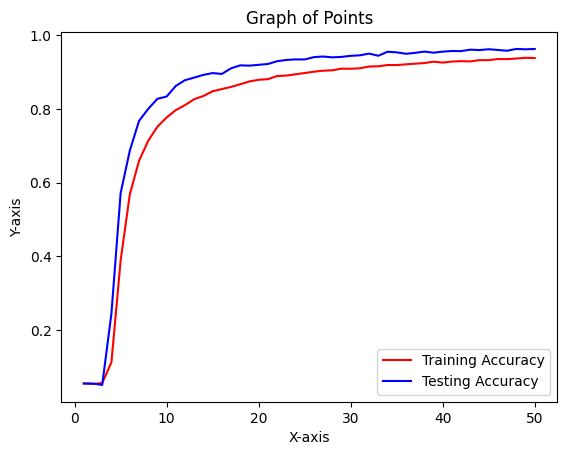

In [11]:
graph_x = [i+1 for i in range(50)]
trainingY = history.history['accuracy']
testingY = history.history['val_accuracy']

plt.plot(graph_x, trainingY, color='red', label='Training Accuracy')
plt.plot(graph_x, testingY, color='blue', label='Testing Accuracy')

# Add titles and labels
plt.title('Graph of Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show legend
plt.legend()

# Display the plot
plt.show()

In [39]:
def checkPred(index):
    correct = findOneIndex(y_test[index])
    print(correct)
    pred = np.argmax(model.predict(np.expand_dims(X_test[index], axis=0))[0])
    print(correct)
    if not (correct == pred):
        print("FALSE!!!!!")
    return (correct == pred)

In [52]:
def add_label_with_prediction(image, label, index, font=cv.FONT_HERSHEY_SIMPLEX, font_scale=0.5, thickness=1):
    labeled_img = np.zeros((image.shape[0] + 20, image.shape[1]), dtype=np.uint8)
    labeled_img[:image.shape[0], :] = image

    label = str(label)
    # Put text on the new image
    color = 255
    if not checkPred(index):
        color = 0
    cv.putText(labeled_img, label, (10, image.shape[0] + 15), font, font_scale, color, thickness, lineType=cv.LINE_AA)

    return labeled_img

# showPics(True)
for i in range(5000):
    if not checkPred(i):
        print("False")


36
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
36
11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
11
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5
18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
18
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
12
38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
38
35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
35
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8
23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
23
25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
25
38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
12
11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
11
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
2
33
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
33
26
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
26
38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
38
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6
38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
38
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5
35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
35
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1
3
1/1 ━━━━━━━━━━━━━━━━━━━